# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

In [172]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import statsmodels.api as smf

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [101]:
# Your code here. 
student_data = pd.DataFrame({'age': [17,51,27,21,36,48,19,26,54,30], 'tardies': [10,1,5,9,4,2,9,6,0,3]})
student_data

,age,tardies
0,17,10
1,51,1
2,27,5
3,21,9
4,36,4
5,48,2
6,19,9
7,26,6
8,54,0
9,30,3


Draw a dispersion diagram (scatter plot) for the data.

<AxesSubplot:xlabel='age', ylabel='tardies'>

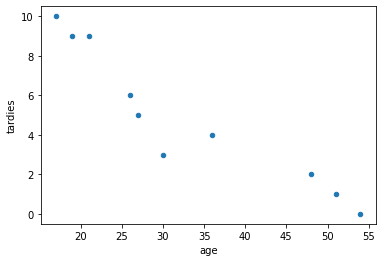

In [102]:
# Your code here.
student_data.plot.scatter(x='age',y='tardies')

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [103]:
# Your response here. 
#There is a lineal regression. The older the students, the less unpunctual they are. 


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [104]:
# Your response here.
student_data.cov()
# There is a negative covariance between X and Y and the value is far from 0. This means there is an inverse 
# relationship between them.

,age,tardies
age,187.655556,-45.566667
tardies,-45.566667,12.544444


In [105]:
student_data.corr()
# There is a high correlation coefficient between both variables as the value between X and Y near to -1. 
# This means an inverse correlation due to the fact that when one of the variables increases, the other one decrease
# and vice versa.

,age,tardies
age,1.000000,-0.939163
tardies,-0.939163,1.000000


Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [106]:
mean_age = student_data.age.mean()
mean_tardies = student_data.tardies.mean()

In [107]:
student_data["age-mean_age"] = student_data.age - mean_age
student_data["tardies-mean_tardies"] = student_data.tardies - mean_tardies

In [108]:
student_data["(age-mean_age)*(tardies-mean_tardies)"] = student_data["age-mean_age"] * student_data["tardies-mean_tardies"] 
student_data["(age-mean_age)**2"] = student_data["age-mean_age"]**2

In [109]:
student_data.head()

,age,tardies,age-mean_age,tardies-mean_tardies,(age-mean_age)*(tardies-mean_tardies),(age-mean_age)**2
0,17,10,-15.9,5.1,-81.09,252.81
1,51,1,18.1,-3.9,-70.59,327.61
2,27,5,-5.9,0.1,-0.59,34.81
3,21,9,-11.9,4.1,-48.79,141.61
4,36,4,3.1,-0.9,-2.79,9.61


In [110]:
m = student_data["(age-mean_age)*(tardies-mean_tardies)"].sum()/student_data["(age-mean_age)**2"].sum()

In [111]:
m

-0.2428207709159808

In [112]:
b = y_ - m*x_

In [113]:
b

12.888803363135768

In [114]:
# I used the Ordinary Least Squares Method (OLS). As I think it was the most precise.

Plot your regression model on your scatter plot.

In [115]:
x = np.arange(0,60,1)
y = m*x + b

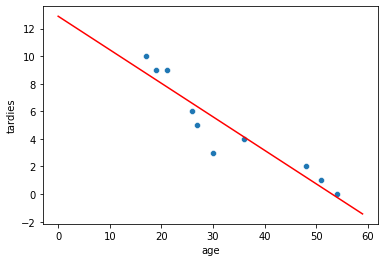

In [116]:
# Your code here.
sns.scatterplot(x=student_data["age"],y=student_data["tardies"])
plt.plot(x,y,c="r")

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [3]:
# Your response here. 


In [58]:
x=np.array([17,51,27,21,36,48,19,26,54,30]).reshape((-1, 1))
y=np.array([10,1,5,9,4,2,9,6,0,3])

In [59]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [60]:
# Your response here.
model = LinearRegression().fit(x, y)

In [61]:
r_sq = model.score(x, y)

In [62]:
print('coefficient of determination:', r_sq)

coefficient of determination: 0.8820265558250109


In [63]:
print('intercept:', model.intercept_)

intercept: 12.888803363135771


In [64]:
print('slope:', model.coef_)

slope: [-0.24282077]


## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [135]:
# Import any libraries you may need & the data

df=pd.read_csv('vehicles.csv')

Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35952 entries, 0 to 35951
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Make                     35952 non-null  object 
 1   Model                    35952 non-null  object 
 2   Year                     35952 non-null  int64  
 3   Engine Displacement      35952 non-null  float64
 4   Cylinders                35952 non-null  float64
 5   Transmission             35952 non-null  object 
 6   Drivetrain               35952 non-null  object 
 7   Vehicle Class            35952 non-null  object 
 8   Fuel Type                35952 non-null  object 
 9   Fuel Barrels/Year        35952 non-null  float64
 10  City MPG                 35952 non-null  int64  
 11  Highway MPG              35952 non-null  int64  
 12  Combined MPG             35952 non-null  int64  
 13  CO2 Emission Grams/Mile  35952 non-null  float64
 14  Fuel Cost/Year        

In [137]:
columns=df.columns
to_remove=[columns[i] for i in [0,1,3,5,6,7,10,11,14]]
df.drop(to_remove, inplace=True, axis=1)

In [146]:
df.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.926229
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,1.000000


In [141]:
# 'Fuel Type' is a categorical variable:
df['Fuel Type'].unique()

array(['Regular', 'Premium', 'Diesel', 'Premium and Electricity',
       'Premium or E85', 'Premium Gas or Electricity', 'Gasoline or E85',
       'Gasoline or natural gas', 'CNG', 'Regular Gas or Electricity',
       'Midgrade', 'Regular Gas and Electricity', 'Gasoline or propane'],
      dtype=object)

In [154]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df['Fuel Type'] = enc.fit_transform(df['Fuel Type'])

In [155]:
df.corr()['CO2 Emission Grams/Mile']

Year                      -0.222300
Cylinders                  0.752393
Fuel Type                 -0.066466
Fuel Barrels/Year          0.986189
Combined MPG              -0.926229
CO2 Emission Grams/Mile    1.000000
Name: CO2 Emission Grams/Mile, dtype: float64

In [ ]:
# Probably the Fuel Type could be a really good variable to determine the CO2 Emission Grams/Mile, 
# But I am unable to find the way of getting the ordinal variable to transform it to numerical data.
# Ignoring this variable the best one (with higher correlation) would be Fuel Barrels/Year.
# But Combined MPG and a bit less Cylinders are also variables with high correlation.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

In [156]:
lr = LinearRegression(fit_intercept=True)
lr.fit(df['Fuel Barrels/Year'].to_frame(),df ['CO2 Emission Grams/Mile'])

LinearRegression()

In [157]:
lr.coef_

array([26.2836254])

In [158]:
lr.intercept_

12.486520830756774

In [162]:
x = np.arange(1,max(df['Fuel Barrels/Year']),1)
y = lr.coef_*x + lr.intercept_

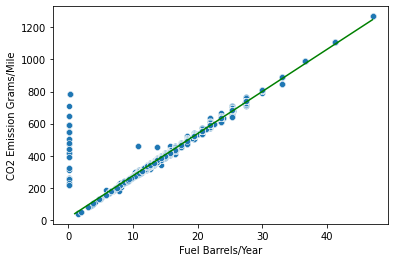

In [163]:
sns.scatterplot(x=df['Fuel Barrels/Year'],y=df["CO2 Emission Grams/Mile"])
plt.plot(x,y,c="g")

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [173]:
mod = smf.OLS(df["CO2 Emission Grams/Mile"],df['Fuel Barrels/Year'])

In [174]:
result = mod.fit()

In [176]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                   OLS Regression Results                                   
============================================================================================
Dep. Variable:     CO2 Emission Grams/Mile   R-squared (uncentered):                   0.998
Model:                                 OLS   Adj. R-squared (uncentered):              0.998
Method:                      Least Squares   F-statistic:                          2.164e+07
Date:                     Mon, 23 Nov 2020   Prob (F-statistic):                        0.00
Time:                             20:13:19   Log-Likelihood:                     -1.5864e+05
No. Observations:                    35952   AIC:                                  3.173e+05
Df Residuals:                        35951   BIC:                                  3.173e+05
Df Model:                                1                                                  
Covariance Type:                 nonrobust                                                  
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Fuel Barrels/Year    26.9498      0.006   4651.565      0.000      26.938      26.961
==============================================================================
Omnibus:                    89555.105   Durbin-Watson:                   0.929
Prob(Omnibus):                  0.000   Jarque-Bera (JB):       1022572329.320
Skew:                          27.472   Prob(JB):                         0.00
Kurtosis:                     827.382   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [7]:
# Your code here. 

Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

In [1]:
# Your code here.

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [2]:
# Your response here. 

Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [5]:
# Your response here. 

What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

In [ ]:
# Your response here. 